# End to End Machine Learning Project

An End to End machine learning model follows the complete lifecycle of a machine learning model which means to first collect data, then prepare the data according to the patterns found in the dataset, then train and evaluate the model and at last deploy the model. So an end to end machine learning project means to present a model in the form of an interactive application that runs the model on the dataset and produces output in the realtime according to the user input. In this article, I will take you through an end to end machine learning project using Python.

An end to end machine learning project means to create an interactive application that runs our trained machine learning model and give output according to the user input. It follows the complete lifecycle of a machine learning model. Below are the steps that you need to follow while creating an end to end application for your model:

1. Data access and collection
2. Data preparation and exploration
3. Model training and evaluation
4. Model deployment

Creating an end to end machine learning application is important to show most of your skills in a single project. In the section below, I will take you through how to create an end to end machine learning application using Python.

# End to End Machine Learning Project using Python

I will be using the streamlit framework in python to create a web interface for interacting with the machine learning model. Here I will deploy a text emotion prediction model which I presented recently in one of the previous articles. You can learn how to train a model for the task of text emotion prediction from <a href="https://github.com/Rasel1435/Machine-Learning-Projects-with-Python-for-Beginners/blob/main/Text%20Emotions%20Detection%20with%20Machine%20Learning/Text_Emotions_Detection_with_Machine_Learning.ipynb">here</a>. Below is the complete code to present this machine learning model in the form of an interactive web interface

In [9]:
#Import Important Libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import streamlit as st

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

st.write("# Text Emotions Prediction")
t1 = st.text_input("Enter any text>>: ")


# Data Collection
def read_data(file):
    data = []
    with open(file, 'r')as f:
        for line in f:
            line = line.strip()
            label = ' '.join(line[1:line.find("]")].strip().split())
            text = line[line.find("]")+1:].strip()
            data.append([label, text])
    return data

file = 'text.txt'
data = read_data(file)
print("Number of instances: {}".format(len(data)))

"""
Now I will create two Python functions for tokenization and generating the features of an input sentence
"""
#First Function
def ngram(token, n): 
    output = []
    for i in range(n-1, len(token)): 
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram) 
    return output

#Second Function
def create_feature(text, nrange=(1, 1)):
    text_features = [] 
    text = text.lower() 
    text_alphanum = re.sub('[^a-z0-9#]', ' ', text)
    for n in range(nrange[0], nrange[1]+1): 
        text_features += ngram(text_alphanum.split(), n)    
    text_punc = re.sub('[a-z0-9]', ' ', text)
    text_features += ngram(text_punc.split(), 1)
    return Counter(text_features)

print(create_feature("I love you!"))
print(create_feature(" aly wins the gold!!!"))
print(create_feature(" aly wins the gold!!!!!", (1, 2)))

"""
Now I will create a Python function to store the labels, our labels will be based on emotions such as Joy, Fear, Anger, and so on
"""
def convert_label(item, name): 
    items = list(map(float, item.split()))
    label = ""
    for idx in range(len(items)): 
        if items[idx] == 1: 
            label += name[idx] + " "
    
    return label.strip()

emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]

X_all = []
y_all = []
for label, text in data:
    y_all.append(convert_label(label, emotions))
    X_all.append(create_feature(text, nrange=(1, 4)))

print("features example: ")
print(X_all[0])
print("Label example:")
print(y_all[0])


#Spliting Data
"""
Now I will split the data into training and test sets
"""
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 123)

def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    return train_acc, test_acc

from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Classifiers 
svc = SVC()
lsvc = LinearSVC(random_state=123)
rforest = RandomForestClassifier(random_state=123)
dtree = DecisionTreeClassifier()

clifs = [svc, lsvc, rforest, dtree]

# train and test them 
print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

l = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
l.sort()
label_freq = {}
for label, _ in data: 
    label_freq[label] = label_freq.get(label, 0) + 1

# print the labels and their counts in sorted order 
for l in sorted(label_freq, key=label_freq.get, reverse=True):
    print("{:10}({})  {}".format(convert_label(l, emotions), l, label_freq[l]))

emoji_dict = {"joy":"😂", "fear":"😱", "anger":"😠", "sadness":"😢", "disgust":"😒", "shame":"😳", "guilt":"😳"}

texts = [t1]
for text in texts: 
    features = create_feature(text, nrange=(1, 4))
    features = vectorizer.transform(features)
    prediction = clf.predict(features)[0]
    st.write(emoji_dict[prediction])

As you are using the streamlit framework here so you have to run this file by using the command streamlit run filename.py. After running this file you will see a web interface that will directly open in your default browser and you will see an output like this

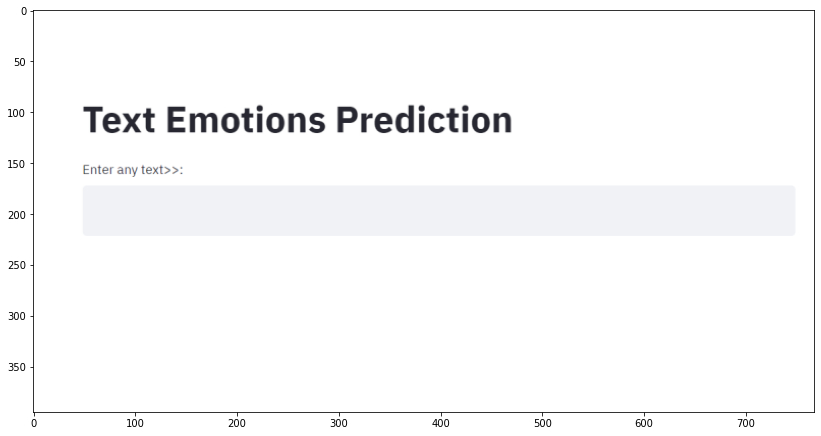

In [12]:
import cv2
output = cv2.imread("./images/strem.png")
img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(14,10))
plt.imshow(img)

# Summary


In this article, I introduced you to how to build an interactive web interface to create an end-to-end machine learning application. The streamlit framework offers a lot of features to make your web interface more interactive and user friendly that you can learn from the official documentation <a href="https://docs.streamlit.io">here</a>. I hope you liked this article om how to create an end to end machine learning model using Python. Feel free to ask your valuable questions in the comments section below.

# Sheikh Rasel Ahmed

### Data Science || Machine Learning || Deep Learning || Artificial Intelligence Enthusiast


##### LinkedIn - https://www.linkedin.com/in/shekhnirob1
##### GitHub - https://github.com/Rasel1435
##### Behance - https://www.behance.net/Shekhrasel2513